# Linear Models

In [1]:
# See binary_classification.py
from binary_classification import *

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

In [3]:
# Load pickled data
df = pd.read_pickle("data/yelp_df_final.pkl")

# Split data
train_df = df[df["dataset"] == "train"]
valid_df = df[df["dataset"] == "val"].reset_index(drop = True)

In [4]:
# Parameters excluded from predictions
exclude = ["review_id", 
           "business_id", 
           "user_id", 
           "label", 
           "date", 
           "categories", 
           "is_open",
           "postal_code", 
           "dataset"]

# Predictors
predictors = list(train_df.columns)
for col in exclude:   
    predictors.remove(col)

# Label
outcome = "label"

## L2-Regularized Logistic Regression

In [5]:
# Initialize class instance
l2 = logreg(train_data = train_df,
            valid_data = valid_df,
            test_data = None,
            predictors = predictors,
            outcome = outcome)

In [6]:
# Train model
l2.train(penalty = "l2",
         max_iter = 100)

Time to train: 675.85


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
# Save trained model object to pickle
pickle_out = open("results/model_l2.pkl", "wb")
pickle.dump(l2.model, pickle_out)
pickle_out.close()

Accuracy:             60.53%
F1:                   49.27%
Precision (PPV):      72.74%
Recall (Sensitivity): 37.25%




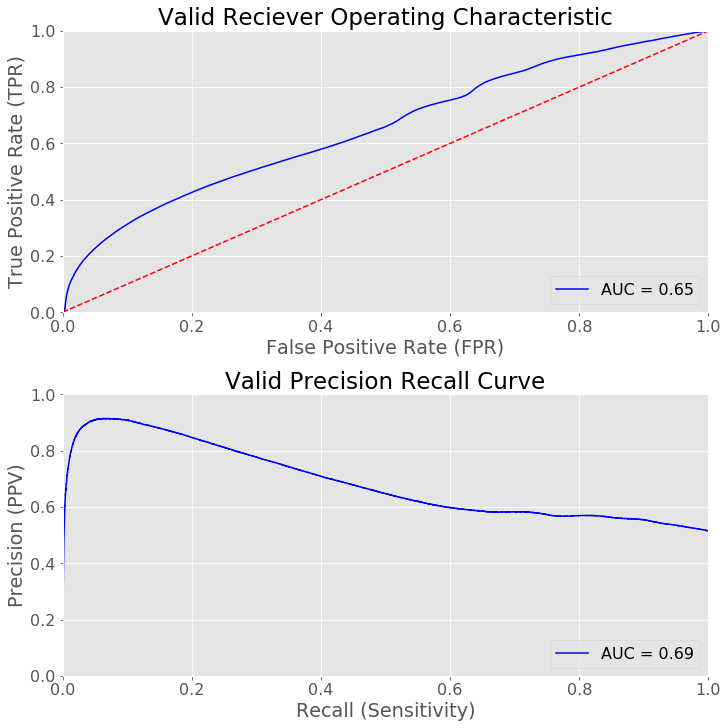

In [8]:
# Cross-Validation
l2.test(prob_set = "Valid")

## L1-Regularized Logistic Regression

In [9]:
# Initialize class instance
l1 = logreg(train_data = train_df,
            valid_data = valid_df,
            test_data = None,
            predictors = predictors,
            outcome = outcome)

In [10]:
# Train model
l1.train(penalty = "l1",
         max_iter = 100)

Time to train: 1232.49


In [11]:
# Save trained model object to pickle
pickle_out = open("results/model_l1.pkl", "wb")
pickle.dump(l1.model, pickle_out)
pickle_out.close()

Accuracy:             74.87%
F1:                   75.25%
Precision (PPV):      76.27%
Recall (Sensitivity): 74.26%




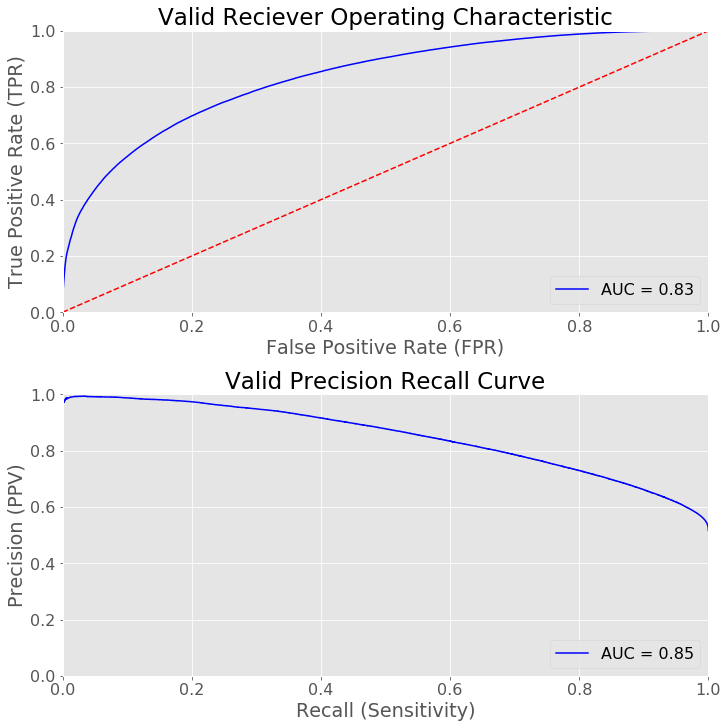

In [12]:
# Cross-Validation
l1.test(prob_set = "Valid")

## GDA

In [13]:
# Initialize class instance
gda = GDA(train_data = train_df,
          valid_data = valid_df,
          test_data = None,
          predictors = predictors,
          outcome = outcome)

In [14]:
# Train model
gda.train()

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Time to train: 205.31


In [15]:
# Save trained model object to pickle
pickle_out = open("results/model_gda.pkl", "wb")
pickle.dump(gda.model, pickle_out)
pickle_out.close()

Accuracy:             74.69%
F1:                   74.98%
Precision (PPV):      76.31%
Recall (Sensitivity): 73.70%




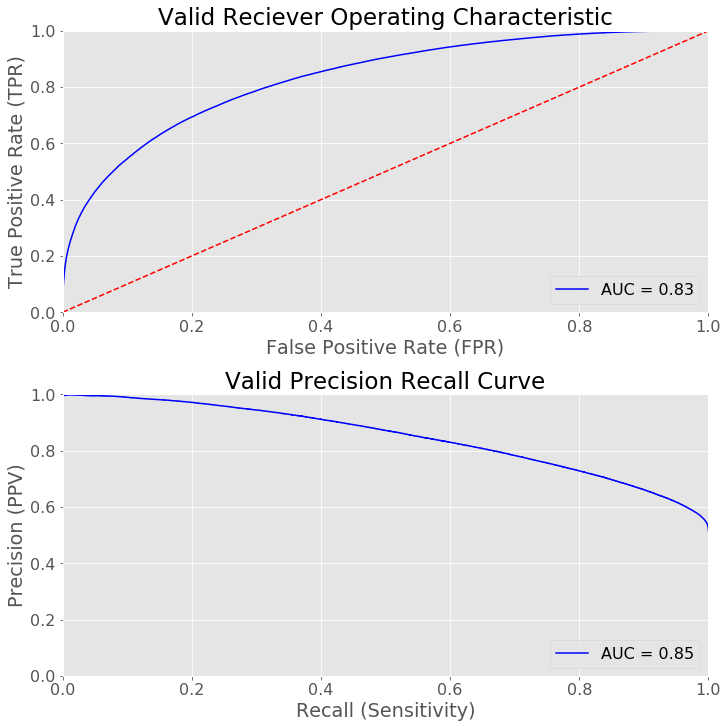

In [16]:
# Cross-Validation
gda.test(prob_set = "Valid")